## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("LoanStatus.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y


In [14]:
median = df["ApplicantIncome"].median()
median

3812.5

In [17]:
mode = df["ApplicantIncome"].mode()
mode

0    2500
Name: ApplicantIncome, dtype: int64

In [15]:
sum = df["LoanAmount"].sum()
count = df["LoanAmount"].count()
avg = sum/count
avg

146.41216216216216

In [18]:
std = df["ApplicantIncome"].std()
std

6109.041673387178

In [19]:
count = df.isna().sum()
count

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [20]:
male_data = df[df["Loan_Status"] == "Y"]["Loan_Status"].count()
total_data = df["Loan_Status"].count()

probability = male_data/total_data
probability


0.6872964169381107

## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html 

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

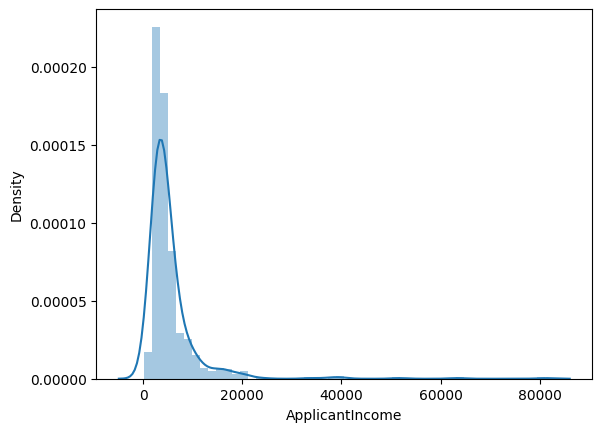

In [28]:
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

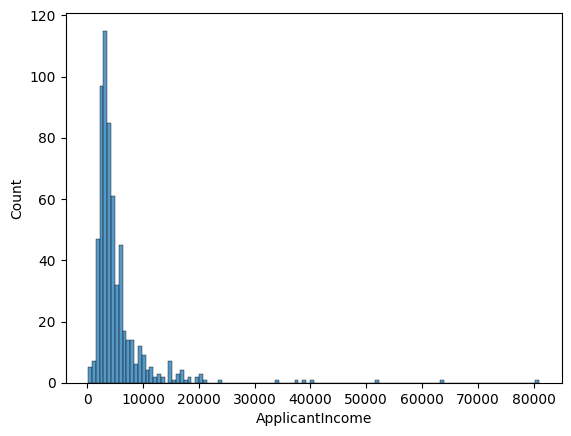

In [29]:
sns.histplot(df["ApplicantIncome"])

In [39]:
hist = plt.hist(
)


TypeError: hist() missing 1 required positional argument: 'x'

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [28]:
from scipy.stats import norm

## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ. 

<Axes: xlabel='ApplicantIncome'>

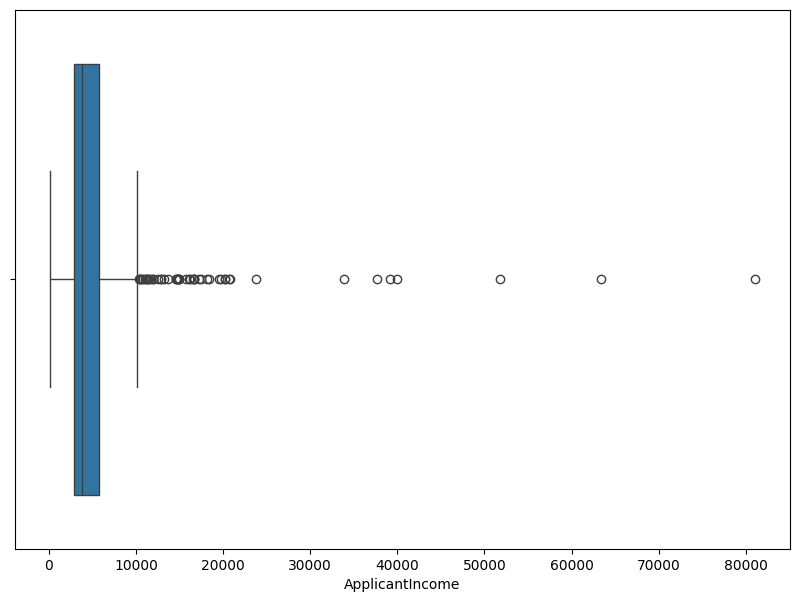

In [34]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x = df['ApplicantIncome'])

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია. 

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია. 

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [38]:
from scipy.stats import ttest_1samp,ttest_ind